In [2]:
#using Natural Language processing to understand the internal meaning or relevence
flag=1
try:
    apikey="ggo-rWPtbUfIw1l7Fl79ghLGuSkBlxY_AYm1iUaloIMD"
    URL="https://gateway.watsonplatform.net/natural-language-understanding/api"
    url=URL
    import pandas as pd
    import json
    from ibm_watson import NaturalLanguageUnderstandingV1
    from ibm_watson.natural_language_understanding_v1 import Features, CategoriesOptions, EmotionOptions
    from spellchecker import SpellChecker

    natural_language_understanding = NaturalLanguageUnderstandingV1(
        version='2019-07-12',
        iam_apikey=apikey,
        url=URL
    )


    print("please enter the URL\n")
    x=input()
    test_url=x
    response = natural_language_understanding.analyze(
        url=test_url,
        features=Features(categories=CategoriesOptions(limit=3))).get_result()

    #print(json.dumps(response, indent=2))

    k=json.dumps(response, indent =3)

    word=""

    score=[0]*3
    key_words=[""]*3
    count=0

    base=k[-352:]

    for i in range(len(base)):
        test=base[i:i+5]
        if(test=="score"):
            score[count]=float(base[i+9:i+15])
            key_words[count]=str(base[i+38:i+71])
            count=count+1

    keys=[]
    scores=[]

    count=-1
    for i in key_words:
        i=i.replace('\n ', '/')
        i=i.replace('"','/')
        i=i.replace(' ','/')
        i=i.replace(']\n','/')
        i=i.replace('},','/')
        i=i.replace('\n','/')
        i=i.replace('}','/')
        i=i.replace('{','/')
        l_check=i.split('/')
        for j in l_check:
            if(j!="and" and len(j)>=1):
                keys.append(j)
                scores.append(score[count])
        count+=1

    di=dict(zip(keys,scores))
    #print(di)
    #print(keys)
    #print(scores)
    sc=SpellChecker()

    count=0
    keys_corrected=[]
    misspelled = sc.unknown(keys)
    for i in misspelled:
        keys[count]=sc.correction(i)
        count=count+1

    #print("printing the corrected words")
    #print(keys)


    import urllib.request
    from bs4 import BeautifulSoup

    url = test_url
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html)

    # kill all script and style elements
    for script in soup(["script", "style"]):
        script.extract()    # rip it out

    # get text
    text = soup.get_text()

    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)

    #print(text)


    import json
    from ibm_watson import NaturalLanguageUnderstandingV1
    from ibm_watson.natural_language_understanding_v1 import Features, EmotionOptions
    try:
        response = natural_language_understanding.analyze(
            html="<html>"+text+"</p></body></html>",
            features=Features(emotion=EmotionOptions(targets=keys))).get_result()
    except:
        print("the keywords not found")
    #print(json.dumps(response, indent=2))


    k=json.dumps(response,indent=2)
    #print(k.find("text"))
    #print(k[24:28])


    import pandas as  pd
    k=json.dumps(response,indent=2)
    #print(k.find("text"))
    k=k[-150:-16]
    word=""
    count=0


    emotions=["sadness","joy","fear","disgust","anger"]
    try:
        emo_intent=[float(k[16:22]),float(k[40:46]),float(k[66:72]),float(k[95:101]),float(k[122:128])]
    except:
        print("exceeded 5000 charectors\n")
        print("enter a smaller article\n")

    df_emo=pd.DataFrame(emo_intent,emotions,columns =['Intensity'])

    df_keys=pd.DataFrame(scores,keys,columns=['key_intensity'])

    print("Keywords are:\n")
    print(df_keys)
    print(" \n")
    print("The emotions behind the text are:\n")
    print(df_emo)


    print("The graph of the emotions could be shown as")
    import matplotlib.pyplot as plt

    ax=df_emo.plot.bar(rot=20)
    plt.ylabel("Intensity")
    plt.xlabel("Emotions")
    plt.title("Emotion Graph")
    ax.set_ylim(0,1)
    flag=0
except Exception as e:
    print(e)

please enter the URL



 https://www.forbes.com/sites/womensmedia/2018/07/09/9-small-steps-that-will-make-you-happier-starting-now/#7c01fcf067de


Keywords are:

            key_intensity
family            0.64428
parenting         0.64428
children          0.64428
business          0.73477
industrial        0.73477
business          0.73477
family            0.68277
parenting         0.68277
babies            0.68277
t                 0.68277
 

The emotions behind the text are:

         Intensity
sadness    0.45738
joy        0.69950
fear       0.09390
disgust    0.03620
anger      0.07380
The graph of the emotions could be shown as


The graph of the emotions could be shown as


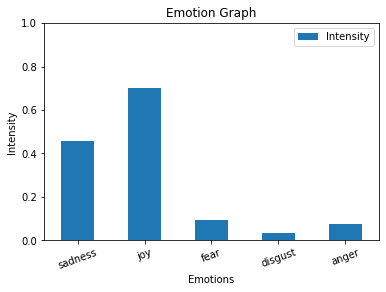

In [3]:
if(flag==0):
    print("The graph of the emotions could be shown as")
    import matplotlib.pyplot as plt

    ax=df_emo.plot.bar(rot=20)
    plt.ylabel("Intensity")
    plt.xlabel("Emotions")
    plt.title("Emotion Graph")
    ax.set_ylim(0,1)